Other cool things we can do with visualization!

https://www.linkedin.com/feed/update/urn:li:activity:6968668384691433472/?utm_source=share&utm_medium=member_desktop

## Practical Exercises

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_9615/3233602182.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Reading the dataset

In [2]:
url = '../data/sysarmy_survey_2020_processed.csv'

# Or we can use this other URL if we are in google colab and we want to read the dataset directly from a server.
# url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'

df = pd.read_csv(url)

The following code cells separate these programming languages and count how often they appear.

It is not necessary to understand this code in depth, although it is a good exercise.

In [42]:
relevant_columns = ['tools_programming_languages',
                    'salary_monthly_NET',
                    'work_contract_type']

# Convert the comma-separated string of languages to a list of string.
# Remove 'None of the previous one' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('none of the previous one', '') \
    .replace('none', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang = df_lang.drop(columns=["tools_programming_languages", "cured_programming_languages"]).reset_index()

In [43]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,cured_programming_languages
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2,[]
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,One,10.0,1,Never,No,201-500,Other industries,8,9,"[html, javascript, python]"
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9,[]


In the `programming_language` column, you will find each language separately. Note that if a response contained 3 languages, such as `"HTML, Javascript, Python"`, the row has been replicated 3 times. Therefore, there are three rows with index 1.

In [44]:
df_lang[:3]

,index,programming_language,salary_monthly_NET,work_contract_type
0,1,html,63000.0,Full-Time
1,1,javascript,63000.0,Full-Time
2,1,python,63000.0,Full-Time


# Exercises

Using the `df`dataframe:

1) Remove the outliers in `df` using the `salary_monthly_NET` column. Consider an outlier all the points which are 2.5 standard deviation from the mean.

2) Plot an scatterplot comparing the `salary_monthly_NET` and the `salary_monthly_GROSS` painting with two different colors points that have a Full-time contract and those with a Part-Time contract.

3) Plot two boxplots comparing the `salary_monthly_NET` of `Full-time` and `Part-time` devs.

Using the `df_lang` dataframe:

4) Use the `programming_language` column and filter all the languages which are not [`javascript`, `sql`, `html`, `python`, `java`]. For those 5 languages create a `barplot` and a `displot` comparing the `salary_montly_NET`. HELP: For the `displot` check the parameter `col` in `seaborn`.

5) Calculate the conditional probability of A = "earning more than $50000" if you use the programming language $L = python$, that is, $P(A|L)$.

6) (Optional) Calculate for each programming language X, the number of developers that use X. HELP: Check the method `value_counts()` in pandas for a random variable (column). Then, obtain the 5 most used programming languages.

In [45]:
# 1

mean_salary = df['salary_monthly_NET'].mean()
std_salary = df['salary_monthly_NET'].std()
lower_bound = mean_salary - 2.5 * std_salary
upper_bound = mean_salary + 2.5 * std_salary

df_no_outliers = df[(df['salary_monthly_NET'] >= lower_bound) & (df['salary_monthly_NET'] <= upper_bound)]

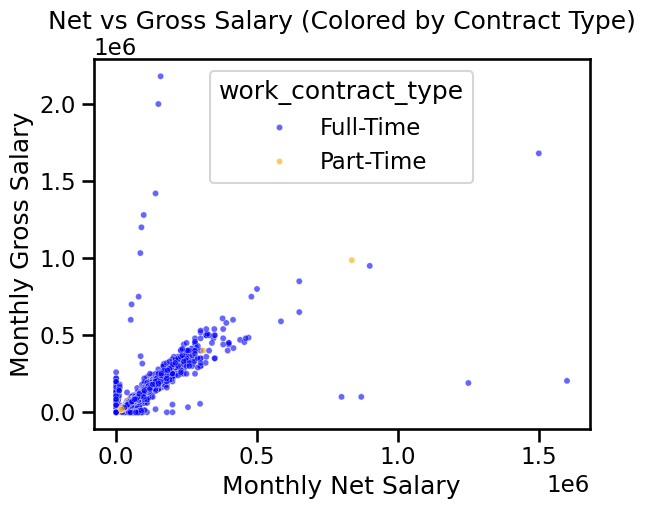

In [46]:
# 2

df_part_full = df[df.work_contract_type.isin(["Full-Time","Part-Time"])]
seaborn.scatterplot(
    x='salary_monthly_NET', 
    y='salary_monthly_GROSS', 
    hue='work_contract_type',   
    data=df_part_full, 
    palette={'Full-Time': 'blue', 'Part-Time': 'orange'},  # Assign specific colors to contract types
    alpha=0.6,
    s=20)

# Add labels and a title to the plot
plt.xlabel('Monthly Net Salary')
plt.ylabel('Monthly Gross Salary')
plt.title('Net vs Gross Salary (Colored by Contract Type)')

# Show the plot
plt.show()



/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_9615/3292823909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


Text(0.5, 1.0, 'Comparison of Monthly Net Salary (Full-time vs Part-time)')

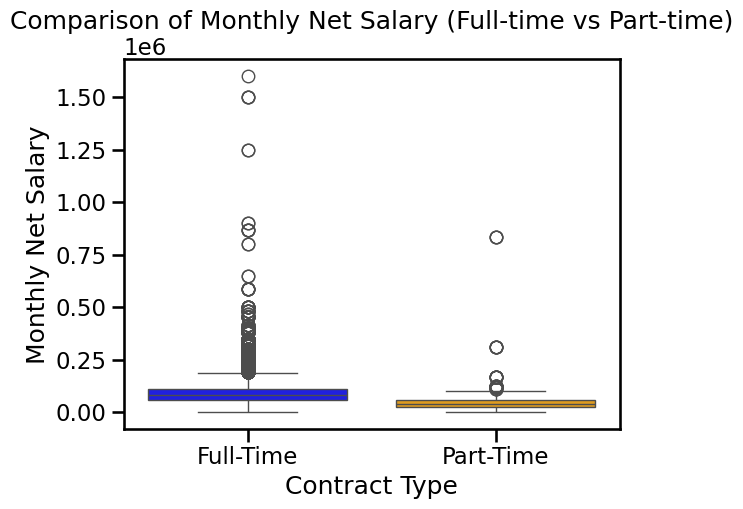

In [48]:
# 3

df_lang_filtered = df_lang[df_lang['work_contract_type'].isin(['Full-Time', 'Part-Time'])]
seaborn.boxplot(
    x='work_contract_type', 
    y='salary_monthly_NET', 
    data=df_lang_filtered,
    palette={'Full-Time': 'blue', 'Part-Time': 'orange'}
)

# Add labels and a title to the plot
plt.xlabel('Contract Type')
plt.ylabel('Monthly Net Salary')
plt.title('Comparison of Monthly Net Salary (Full-time vs Part-time)')



/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_9615/3162571150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


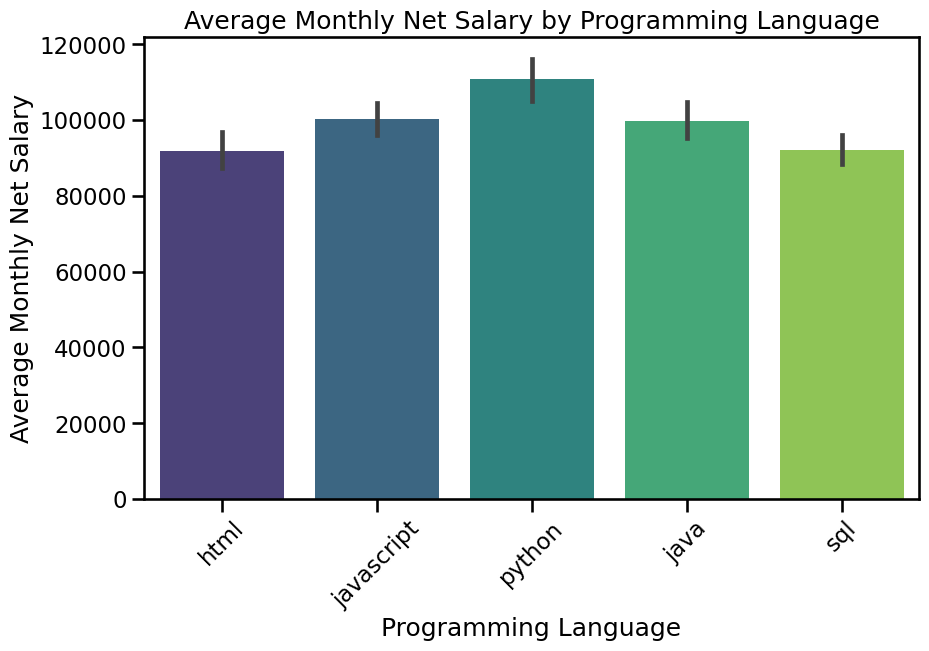

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_9615/3162571150.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.displot(


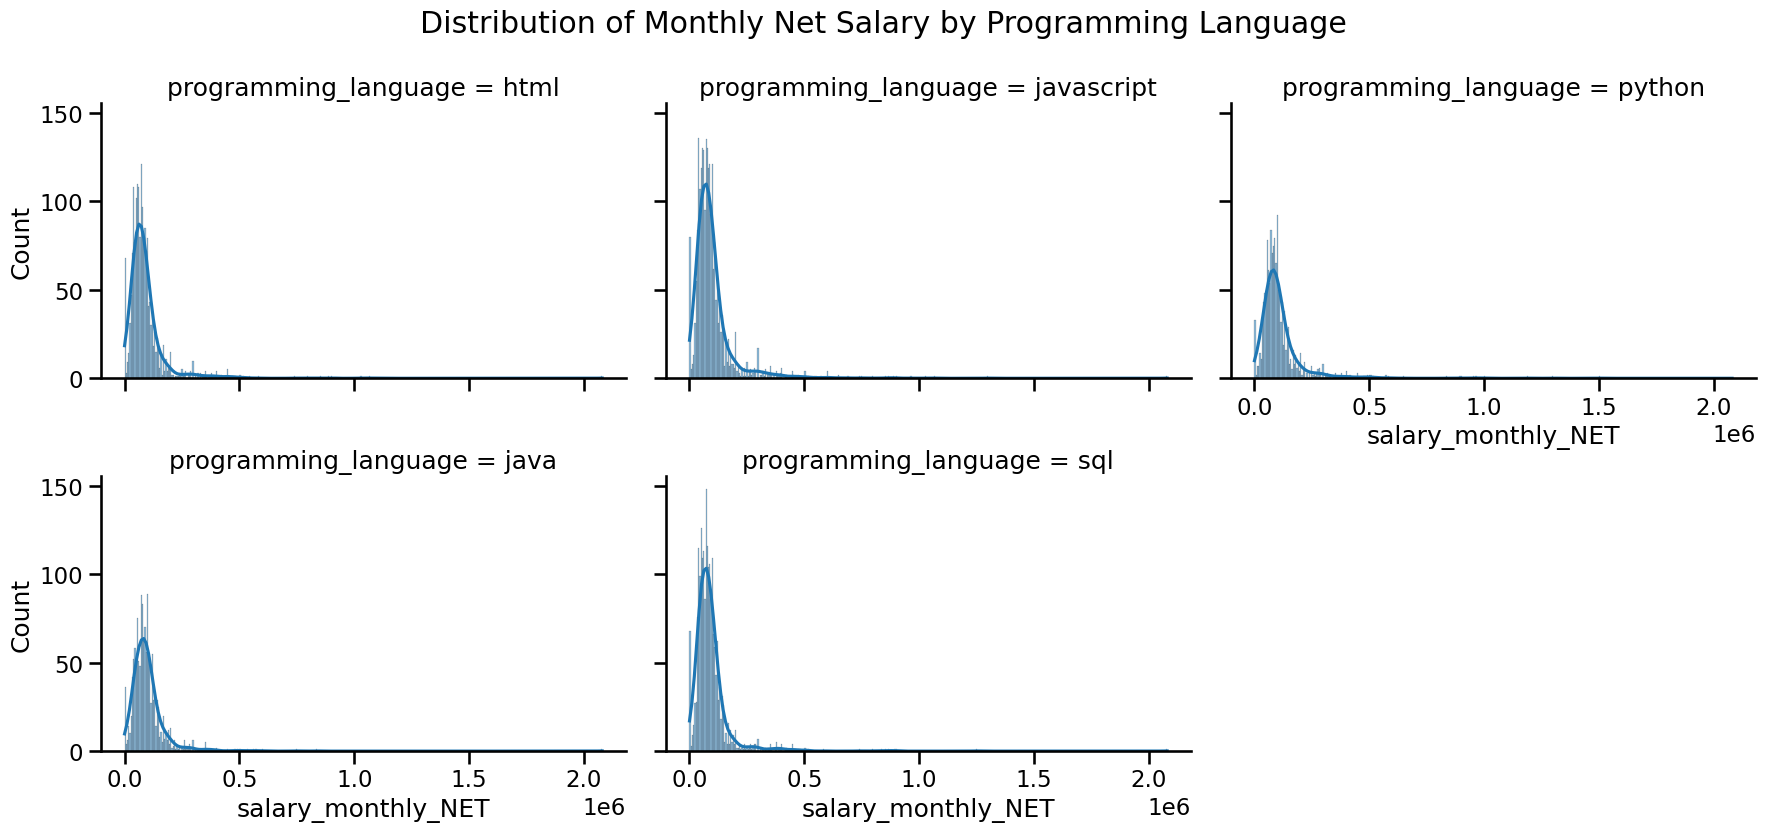

In [51]:
# 4 
df_lang
languages = ['javascript', 'sql', 'html', 'python', 'java']
df_filtered = df_lang[df_lang['programming_language'].isin(languages)]

# Create a bar plot comparing average salary_monthly_NET for each language
plt.figure(figsize=(10, 6))
seaborn.barplot(
    x='programming_language', 
    y='salary_monthly_NET', 
    data=df_filtered,
    estimator='mean',  # Show the average salary
    palette='viridis'
)
plt.xlabel('Programming Language')
plt.ylabel('Average Monthly Net Salary')
plt.title('Average Monthly Net Salary by Programming Language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# # Create a displot for salary_monthly_NET for each programming language
g = seaborn.displot(
    data=df_filtered,
    x='salary_monthly_NET',
    col='programming_language',
    col_wrap=3,  # Adjust to fit the number of plots per row
    kde=True,    # Add Kernel Density Estimate to the plot
    palette='viridis',
    height=4,     # Adjust the height of each facet
    aspect=1.5    # Adjust the aspect ratio of each facet
)
g.fig.suptitle('Distribution of Monthly Net Salary by Programming Language', y=1.05)
plt.show()


In [90]:
df_filtered.groupby("programming_language").agg({"salary_monthly_NET":"mean" })

,salary_monthly_NET
programming_language,
html,91807.318308
java,99769.704651
javascript,100349.853843
python,110805.045791
sql,92165.221091


In [91]:

# 5
python_users = df_lang['programming_language']=='python'
num_high_earners= df_lang['salary_monthly_NET'] > 50000

intersection_count = len(df_lang[python_users & num_high_earners])
p_high_earners_python = intersection_count / sum(python_users)

print(f"Conditional Probability: {p_high_earners_python}")


Conditional Probability: 0.8108474576271186


In [92]:
# 6
# Count the number of developers using each programming language
language_counts = df_lang['programming_language'].value_counts()

# Print the count of each programming language
print("Number of developers using each programming language:")
print(language_counts)

# Obtain the 5 most used programming languages
top_5_languages = language_counts.head(5)

print("\nTop 5 most used programming languages:")
print(top_5_languages)


Number of developers using each programming language:
programming_language
javascript    2513
sql           2154
html          1861
python        1475
java          1453
              ... 
powercli         1
boomi            1
dell             1
x++              1
infobasic        1
Name: count, Length: 207, dtype: int64

Top 5 most used programming languages:
programming_language
javascript    2513
sql           2154
html          1861
python        1475
java          1453
Name: count, dtype: int64
